In [36]:
from DataReader import DataReader

dr = DataReader(hours=9)
X,y = dr.data()

In [37]:
import numpy as np

In [38]:
X = np.concatenate((X,(X**2),(X**3)),axis=1)

In [39]:
def normal(X):
    mu = X.mean(axis=0)
    std = X.std(axis=0)
    X_norm = (X-mu)/std
    return X_norm,mu,std

In [40]:
X_norm,mu,std = normal(X)

In [41]:
import torch
import torch.nn as nn

In [42]:
X_norm = torch.from_numpy(X_norm.astype(np.float32))
y = torch.from_numpy(y.astype(np.float32))

In [43]:
class LinearRegressionModel(nn.Module):
    
    def __init__(self,n_features):
        super(LinearRegressionModel,self).__init__()
        self.Lin = nn.Linear(in_features=n_features,out_features=1,bias=True)
    
    def forward(self,X):
        return self.Lin(X)

In [45]:
model = LinearRegressionModel(X.shape[1])

epoches = 10000
lr = 0.01

optimizer = torch.optim.SGD(model.parameters(),lr=lr,weight_decay=0.05)
criterion = nn.MSELoss()

train_loss_history = []
# test_loss_history = []

for epoch in range(epoches):
    y_pred = model(X_norm)
    loss = criterion(y_pred,y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    train_loss_history.append(loss.detach().item())
    
#     with torch.no_grad():
#         y_pred = model(X_test_norm)
#         test_loss = criterion(y_pred,y_test)
    
#     test_loss_history.append(test_loss.detach().item())
        
#     if (epoch+1) % 1000 == 0:
#         print(f'epoch:{epoch+1} loss:{loss.detach().item()} test loss:{test_loss.detach().item()}')
    
    if (epoch+1) % 1000 == 0:
        print(f'epoch:{epoch+1} loss:{loss.detach().item()}')
        
# print(f'last train loss:{train_loss_history[-1]}\n last test loss:{test_loss_history[-1]}')
print(f'\nlast train loss:{train_loss_history[-1]}')

epoch:1000 loss:33.86798858642578
epoch:2000 loss:32.88368225097656
epoch:3000 loss:32.60577392578125
epoch:4000 loss:32.50132751464844
epoch:5000 loss:32.4572868347168
epoch:6000 loss:32.43753433227539
epoch:7000 loss:32.4283561706543
epoch:8000 loss:32.4239387512207
epoch:9000 loss:32.42176818847656
epoch:10000 loss:32.42073059082031

last train loss:32.42073059082031


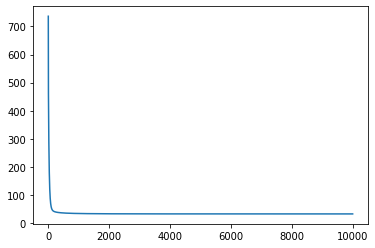

In [46]:
import matplotlib.pyplot as plt

plt.plot(train_loss_history)
# plt.plot(test_loss_history)

# plt.legend(['train','test'])

In [47]:

import pandas as pd


# In[ ]:


df = pd.read_csv('test.csv',header=None)
df[df=='NR'] = 0
df.drop([0,1],axis=1,inplace=True)
# df.head(18)


# In[ ]:


test_data = np.array(df)


# In[ ]:


test_data = test_data.astype(np.float32).reshape(240,-1)


# In[ ]:


test_data = np.concatenate((test_data,(test_data**2),(test_data**3)),axis=1)


# In[ ]:


test_data = (test_data-mu)/std



In [48]:
test_data = torch.from_numpy(test_data.astype(np.float32))

In [49]:
with torch.no_grad():
    p = model(test_data)
    out_df = pd.DataFrame({'id':[f'id_{i}' for i in range(240)],'value':p.flatten()})
    out_df.to_csv('result.csv',index=False)